Exercicio nº 7
Cremildo Riba Gouveia Dias

Using the dataset in EFIplus_medit.zip:
1. Run agglomerative cluster analysis using different linkage methods based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins.
2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

In [1]:


# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Importar ficheiro
df = pd.read_csv("D:\\avdac\greends-avcd\people\cremildo\EFIplus_medit.zip",compression="zip", sep=";")
df = df.dropna() # drops rows when  all elements are missing values
list(df)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

In [2]:
dfsubset = df[(df['Catchment_name']=='Douro') |
        (df['Catchment_name']=='Tejo')]

In [3]:
# Subset the df by selecting the environmental variables and the species richness columns
df_clust = dfsubset[["Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df_clust

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
18,1179,0.001,1687.103217,810.092422,9.3,1.4,18.4
19,1038,2.258,1293.238318,650.030528,10.4,2.2,19.6
28,636,0.263,967.398405,513.949149,12.6,3.8,21.3
32,890,2.909,1088.329483,553.756064,11.2,2.7,20.5
43,872,3.530,985.273741,518.863081,11.1,2.6,20.0
...,...,...,...,...,...,...,...
4947,38,0.100,704.675069,515.039678,17.1,10.3,23.8
4948,26,0.100,702.673201,516.097287,17.1,10.4,23.6
4949,20,0.100,697.730192,518.386401,16.7,10.8,22.9
4950,13,0.100,679.784324,556.028518,16.7,10.9,22.7


2. Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

In [4]:
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
from scipy.cluster.hierarchy import dendrogram, linkage # to run the linkage method and create dendrograms
from sklearn.cluster import AgglomerativeClustering # to perform agglomerative clustering

Text(0, 0.5, 'Distance')

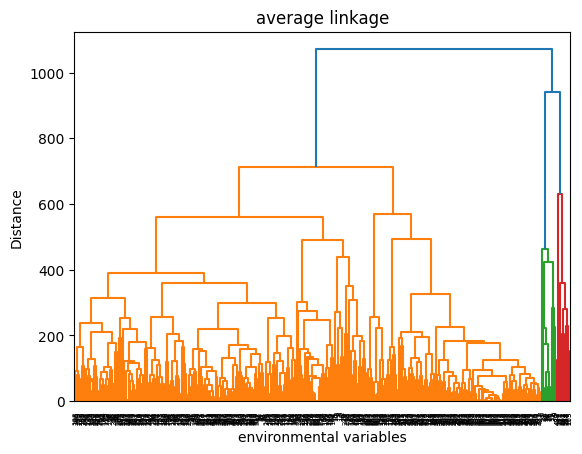

In [5]:
dendrogram_plot = dendrogram(linkage(df_clust, method='average'))
plt.title('average linkage' )
plt.xlabel('environmental variables')
plt.ylabel('Distance')

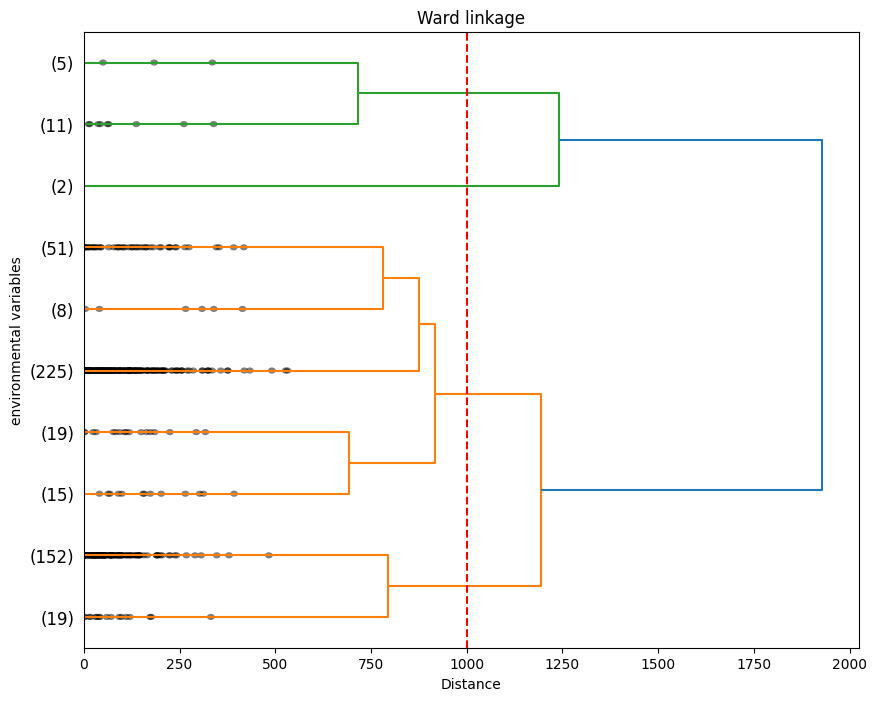

In [7]:
# run linkage
linkclust = linkage(df_clust, 
                   metric = 'cityblock', # cityblock or Manhattan dissimilarity for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkclust, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage' )
plt.xlabel('Distance')
plt.ylabel('environmental variables')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=1000, color='r', linestyle='--')

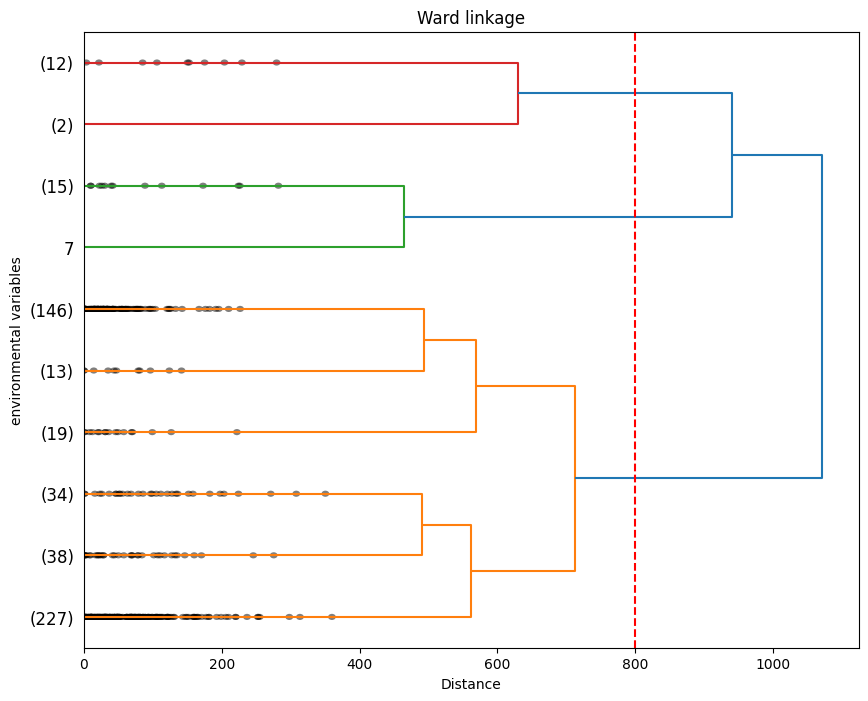

In [9]:

# run linkage
linkclust = linkage(df_clust, 
                   metric = 'euclidean', # Euclidean distance for the dissimilarity matrix
                   method='average') # you may compare with other methods except 'centroid' and 'ward' which will only run only with euclidean distances.

# run dendrogram
plt.figure(figsize=(10, 8))
dendrogram_plot = dendrogram(linkclust, 
                            truncate_mode='lastp',  # show only the last p merged clusters - important when there are too many objects
                            p=10,  # p merged clusters to show 
                            leaf_font_size=12.,
                            show_contracted=True,  # to get a distribution impression in truncated branches
                            orientation='right') # orientation 90º right
plt.title('Ward linkage' )
plt.xlabel('Distance')
plt.ylabel('environmental variables')

# set the number and cluster composition by considering a maximum distance of 8 by drawing a vertical line (x=8)
plt.axvline(x=800, color='r', linestyle='--')

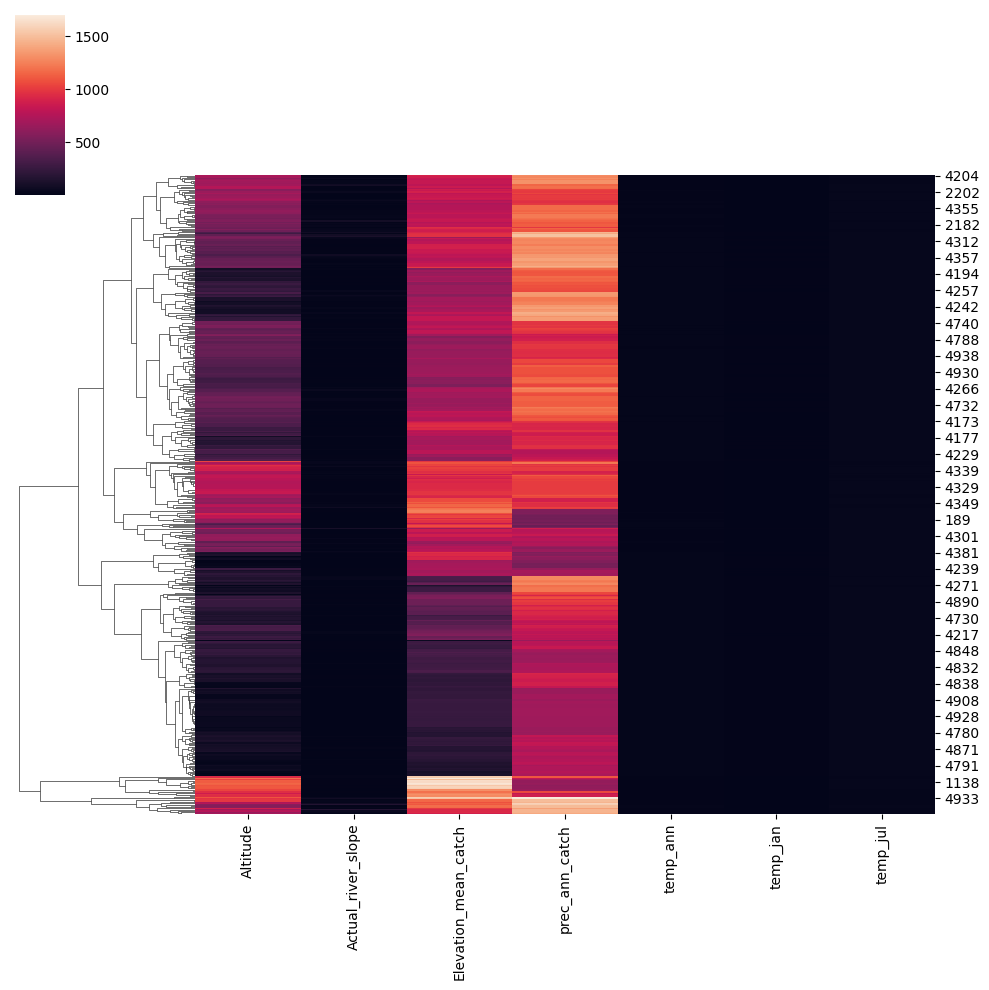

In [10]:
#Plot a heatmap
sns.clustermap(df_clust, col_cluster=False, row_cluster=True, method='average')

In [12]:
#Padronização das variaveis
from sklearn.preprocessing import StandardScaler
df_clust_scaled = StandardScaler().fit_transform(df_clust)

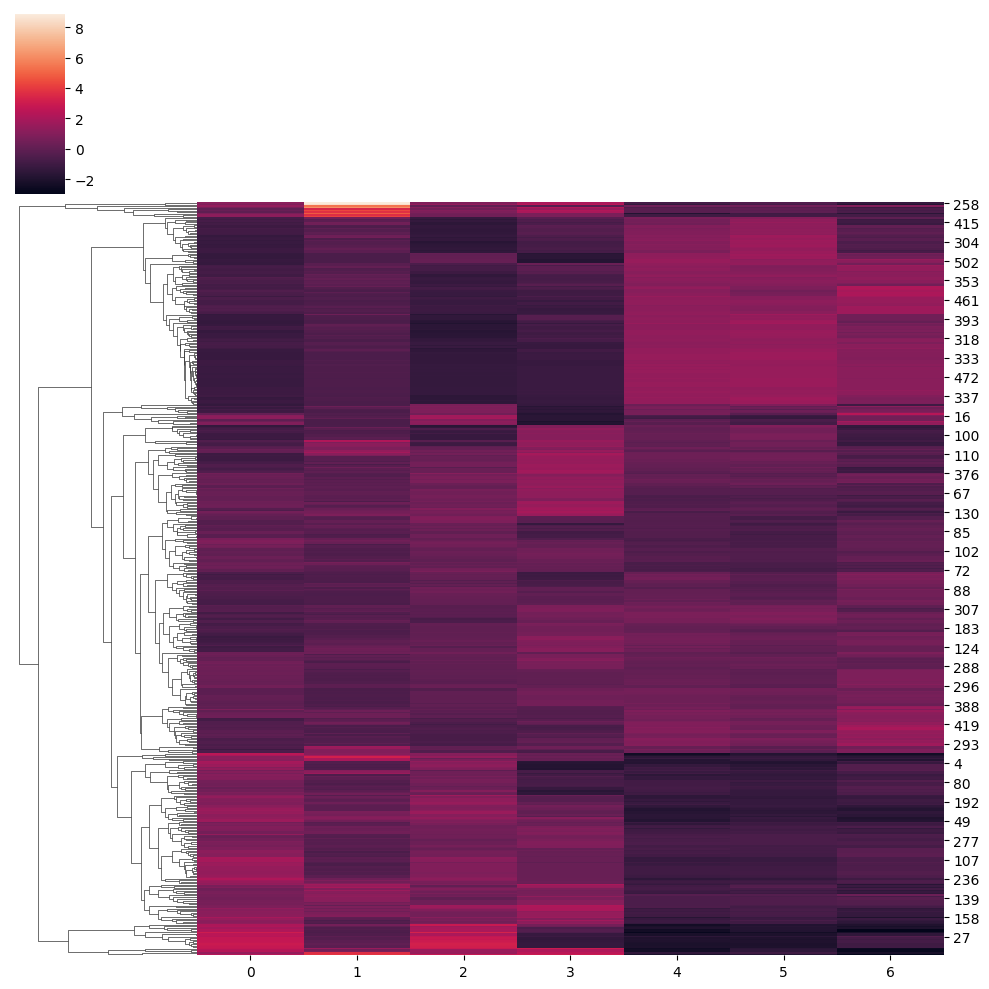

In [13]:
#Plot a heatmap com variaveis padronizados
sns.clustermap(df_clust_scaled, col_cluster=False, row_cluster=True, method='average')